# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import requests
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer
import tweepy
import re
import seaborn as sns
%matplotlib inline 

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_enhanced = pd.read_csv("twitter-archive-enhanced.csv")
pd.set_option("display.max_colwidth", None)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image_prediction.tsv", mode= "wb") as file:
    file.write(response.content)

In [5]:
image_prediction = pd.read_csv("image_prediction.tsv", "\t")

C:\Users\user\anaconda3\envs\udacity_data_analyst_nanodegree\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
with open ("twitter_verification.txt","r") as token:
    consumer_key = token.readline().split(":")[1].strip()
    consumer_secret = token.readline().split(":")[1].strip()
    access_token = token.readline().split(":")[1].strip()
    access_token_secret = token.readline().split(":")[1].strip()
    
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [ ]:
tweet_ids = twitter_enhanced.tweet_id.values
len(tweet_ids)

In [ ]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except AttributeError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
df_list = []
with open ("tweet-json.txt") as file:
    for line in file.readlines():
        json_object = json.loads(line.strip())
        df_list.append({"tweet_id":json_object.get("id"),
                    "retweet_count":json_object.get("retweet_count"),
                    "favorite_count":json_object.get("favorite_count")})
counts = pd.DataFrame(df_list, columns = ["tweet_id", "retweet_count", "favorite_count"])

## Assessing Data

In [7]:
twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [8]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [10]:
twitter_enhanced.shape

(2356, 17)

In [11]:
image_prediction.shape

(2075, 12)

In [12]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [16]:
counts.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [17]:
twitter_enhanced.duplicated().sum()

0

In [18]:
image_prediction.duplicated().sum()

0

In [19]:
counts.duplicated().sum()

0

In [20]:
twitter_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [22]:
# Extract ratings from each tweet in the text column in twitter_enhanced table using regular expression for indepth assessment
ratings = []
pattern = r'[0-9.]+/\d{1,}'
for tweet in twitter_enhanced["text"]:
    rating = re.findall(pattern, tweet, flags=re.IGNORECASE)
    ratings.append(rating)

# Display information where more than one pattarns were matched
for index, rating in enumerate(ratings):
    if len(rating)>1:
        print(index, rating)

55 ['17/10', '13/10']
313 ['960/00', '13/10']
561 ['12/10', '11/10']
766 ['12/10', '11/10']
784 ['9/11', '14/10']
860 ['8/10', '11/10']
1007 ['10/10', '7/10']
1068 ['9/11', '14/10']
1165 ['4/20', '13/10']
1202 ['50/50', '11/10']
1222 ['10/10', '8/10']
1359 ['9/10', '2/10']
1459 ['4/10', '13/10']
1465 ['10/10', '5/10']
1508 ['5/10', '10/10']
1525 ['10/10', '6/10']
1538 ['11/10', '10/10']
1662 ['7/11', '10/10']
1795 ['10/10', '11/10']
1832 ['10/10', '7/10']
1897 ['10/10', '4/10']
1901 ['5/10', '8/10']
1970 ['8/10', '11/10']
2010 ['10/10', '7/10', '12/10']
2064 ['11/10', '8/10']
2113 ['11/10', '8/10']
2177 ['10/10', '7/10']
2216 ['8/10', '1/10']
2263 ['10/10', '4/10']
2272 ['7/10', '8/10']
2298 ['10/10', '10/10']
2306 ['10/10', '10/10']
2335 ['1/2', '9/10']


In [23]:
# For further visual assessment
twitter_enhanced.iloc[[2335]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [24]:
image_prediction[image_prediction["tweet_id"]==666287406224695296]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [25]:
# Extracting the stages of dog from the text column into a list for indepth assessments 
dog_stages = []

for text in twitter_enhanced["text"]:
    floofer = re.findall('floof[a-zA-Z]*', text, flags=re.IGNORECASE)
    doggo = re.findall('doggo[a-zA-Z]*', text, flags=re.IGNORECASE)
    pupper = re.findall('pupper[a-zA-Z]*', text, flags=re.IGNORECASE)
    puppo =  re.findall('puppo[a-zA-Z]*', text, flags=re.IGNORECASE)
    combined = floofer + doggo + pupper + puppo
    if combined:
        dog_stages.append(combined)
    else:
        dog_stages.append([])
        
for index, dog_stage in enumerate(dog_stages):
    if len(dog_stage)>1:
        print(index, dog_stage)

46 ['floofiest', 'floofer']
172 ['doggo', 'puppon', 'Puppollock']
191 ['doggo', 'puppo']
200 ['Floofer', 'doggo']
323 ['DOGGO', 'DOGGO']
433 ['floofs', 'floofs']
460 ['doggo', 'Pupper']
531 ['doggo', 'doggo', 'pupper', 'Pupper']
565 ['doggo', 'pupper']
575 ['doggo', 'pupper']
631 ['pupper', 'pupper']
705 ['doggo', 'pupper']
733 ['Doggo', 'Pupper']
764 ['Floofy', 'doggo']
778 ['doggo', 'pupper']
822 ['doggo', 'pupper']
835 ['Floofy', 'doggo']
881 ['Doggo', 'doggo']
889 ['doggo', 'pupper']
956 ['doggo', 'pupper']
1000 ['PUPPER', 'pupper']
1063 ['doggo', 'pupper']
1113 ['doggo', 'pupper']
1152 ['Floofem', 'pupper']
1304 ['pupper', 'pupper']
1340 ['pupper', 'pupper']
1367 ['pupper', 'pupper']
1382 ['Pupper', 'pupper']
1653 ['pupper', 'pupper']
1788 ['pupper', 'pupper']
1828 ['pupper', 'pupper']
1907 ['pupper', 'pupper', 'pupper']


In [26]:
# For further visual assessment
twitter_enhanced.iloc[[956]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,doggo,None,pupper,None


From the above assessment, the accurate dog stage for instances where a dog image has more than one dog-stage name are harshed with their individual index number using dictionary as shown below:

In [27]:
dog_stage_name = {"191":"puppo", "200":"floofer", "460":"pupper", "531":"pupper",
    "575":"pupper", "889":"doggo", "956":"None", "1063":"doggo",
    "1152":"pupper"}

In [28]:
# create a dataframe from image prediction table where p1, p2, and p3 are all False
not_dog_df = image_prediction[(image_prediction["p1_dog"]==False)&(image_prediction["p2_dog"]==False)&
                              (image_prediction["p3_dog"]==False)]
not_dog_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
471,675135153782571009,https://pbs.twimg.com/media/CV6P1lnWIAAUQHk.jpg,1,stove,0.587507,False,rotisserie,0.051713,False,microwave,0.020725,False
698,684567543613382656,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False
841,694905863685980160,https://pbs.twimg.com/media/CaTNMUgUYAAB6vs.jpg,1,bow_tie,0.449268,False,fur_coat,0.139099,False,black-footed_ferret,0.082232,False
1258,748692773788876800,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False
1240,746906459439529985,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,1,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False


In [29]:
# To each tweet link from the twitter_enhanced table for further assessment
twitter_enhanced[twitter_enhanced["tweet_id"] == 672902681409806336]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1984,672902681409806336,NaN,NaN,2015-12-04 22:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jimison. He's stuck in a pot. Damn it Jimison. 9/10 https://t.co/KpLyca3o3E,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672902681409806336/photo/1,9,10,Jimison,None,None,None,None


> After Assessing random images from the image_prediction on twitter via the image's url and tweet's url, the images with the following tweet_id below are actual dog images

In [30]:
# The images with the following tweet_id are actual dog images. 
is_dog = [670361874861563904, 731156023742988288, 672902681409806336, 670468609693655041, 755206590534418437, 
          892420643555336193, 690932576555528194, 742465774154047488, 742161199639494656, 666983947667116034, 
          742528092657332225, 767191397493538821]

### Quality Issues
#####  `twitter_enhanced table`



1. 204 and 170 rating_numerator and rating_denominator respectively for tweet_id: 731156023742988288, is a combined rating of 17 dogs.

2. 80/80 ratings for tweet_id: 710658690886586372 is a combined rating for 8 dogs

3. The numerator rating for tweet_id: 786709082849828864 should be 9.75 (apprxiamtely 10) and not 75

4. Numerator rating for tweet_id: 778027034220126208 should be 11.25 (approximately 11) instead of 25

5. This tweet_id:810984652412424192 has no dog rating hence the ratings for both numerator and denominator should be empty

6. Ratings 165 and 150 for numerator and denominator is a combined rating of 15 dogs of same breed for tweet_id: 758467244762497024

7. Image prediction with tweet_id: 694352839993344000 image number is 2 hence the ratings should be 5 and 10 and not 10 and 10 for numerator and denominator ratings respectively.

8. 144/120 ratings with tweet_id: 677716515794329600 is a combined rating for 12 dogs

9. Ratings for 682962037429899265 should be 10 and 10 for numerator and denominator respectively and not 7 and 11

10. Ratings for tweet_id: 722974582966214656 are 13 and 10 for numerator and denominator respectively 

11. Ratings for tweet_id: 716439118184652801 are 13 and 10 for numerator and denominator respectively and not 50 and 50

12. Ratings for tweet_id: 666287406224695296 should be 9/10 and not 1/2

13. Numerator ratings for 674646392044941312 should be 8 and not 5

14. Ratings contain comments and retweets 

##### `image_prediction table`

15. The prediction algorithm got it wrong on some dog images. 



### Tidiness issues
1. One variable in four columns in `twitter_enhanced` table(dog stage)

2. tweet's url in text column in `twitter_enhanced` table should be in a separate column

3. more than one dog breed type per dog in the `image_prediction ta

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
df_twitter = twitter_enhanced.copy() 
df_predictions = image_prediction.copy()
df_counts = counts.copy()

### Tidiness Issue

#### 1. Extract dog stage name from the text column using regular expression into a new column, check for consistency in the stage dog name and drop the irrelevant columns.

#### Code

In [33]:
dog_stages = []

for text in df_twitter["text"]:
    floofer = re.findall('floof[a-zA-Z]*', text, flags=re.IGNORECASE)
    doggo = re.findall('doggo[a-zA-Z]*', text, flags=re.IGNORECASE)
    pupper = re.findall('pupper[a-zA-Z]*', text, flags=re.IGNORECASE)
    puppo =  re.findall('puppo[a-zA-Z]*', text, flags=re.IGNORECASE)
    combined = floofer + doggo + pupper + puppo
    if combined:
        dog_stages.append(combined)
    else:
        dog_stages.append([])
        
for index, dog_stage in enumerate(dog_stages):
    if len(dog_stage)>1:
        print(index, dog_stage)

46 ['floofiest', 'floofer']
172 ['doggo', 'puppon', 'Puppollock']
191 ['doggo', 'puppo']
200 ['Floofer', 'doggo']
323 ['DOGGO', 'DOGGO']
433 ['floofs', 'floofs']
460 ['doggo', 'Pupper']
531 ['doggo', 'doggo', 'pupper', 'Pupper']
565 ['doggo', 'pupper']
575 ['doggo', 'pupper']
631 ['pupper', 'pupper']
705 ['doggo', 'pupper']
733 ['Doggo', 'Pupper']
764 ['Floofy', 'doggo']
778 ['doggo', 'pupper']
822 ['doggo', 'pupper']
835 ['Floofy', 'doggo']
881 ['Doggo', 'doggo']
889 ['doggo', 'pupper']
956 ['doggo', 'pupper']
1000 ['PUPPER', 'pupper']
1063 ['doggo', 'pupper']
1113 ['doggo', 'pupper']
1152 ['Floofem', 'pupper']
1304 ['pupper', 'pupper']
1340 ['pupper', 'pupper']
1367 ['pupper', 'pupper']
1382 ['Pupper', 'pupper']
1653 ['pupper', 'pupper']
1788 ['pupper', 'pupper']
1828 ['pupper', 'pupper']
1907 ['pupper', 'pupper', 'pupper']


In [34]:
dog_stage_name = {"191":"puppo", "200":"floofer", "460":"pupper", 
                  "531":"pupper", "575":"pupper", "889":"doggo", 
                  "956":"None", "1063":"doggo", "1152":"pupper"}

In [35]:
dog_stage = []
for index, stage in enumerate(dog_stages):
    if str(index) in dog_stage_name:
        if dog_stage_name[str(index)] == "None":
            dog_stage.append(dog_stage_name[str(index)])
        else:
            dog_stage.append(dog_stage_name[str(index)].lower())
    elif len(stage)>0:
        dog_stage.append(stage[0].lower())
    else:
        dog_stage.append("None")
        
df_twitter["dog_stage"] = dog_stage

In [36]:
def clean_dog_stage(x):
    if x in clean_dict:
        return clean_dict[x]
    else:
        return x
    
clean_dict = {"puppers":"pupper", "floof":"floofer", "doggos":"doggo", "floofy":"floofer", "puppologize":"puppo",
     "floofs":"floofer", "floofmallow":"floofer", "puppoccino":"puppo", "pupporting":"puppo", "puppertunity":"pupper",
     "pupposes":"puppo", "pupperdoop":"pupper", "pupporazzi":"puppo", "floofiest":"floofer", "floofem":"floofer",
     "floofboop":"floofer", "floofapolis":"floofer", "puppergeddon":"pupper"}

df_twitter["dog_stage"] = df_twitter["dog_stage"].map(lambda x:clean_dog_stage(x))
df_twitter.drop(columns=["puppo","doggo","pupper","floofer"], inplace=True)

#### Test

In [37]:
df_twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None


#### 2. Separate the tweet url in the text column to a new column using regular expression and pandas extract method. 

#### Code

In [38]:
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)'
df_twitter['tweet_url']= df_twitter["text"].str.extract(pattern, expand=False).str.strip()
df_twitter["text"] = df_twitter["text"].apply(lambda x : re.sub(r'https?://\S+', '.', x))

#### Test

In [39]:
df_twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,https://t.co/MgUWQ76dJU


#### 3. Drop rows in the `df_predictions` tabel  where p1, p2, and p3 is all False except those with tweet_ids in the `is_dog` list and a also create a single column for dog breed by selecting the result of the model with the most confident prediction except where all outcomes are false in which case the least confident outcome should be selected. 

In [40]:
# Before cleaning
df_predictions.shape

(2075, 12)

#### Code

In [41]:
is_dog

[670361874861563904,
 731156023742988288,
 672902681409806336,
 670468609693655041,
 755206590534418437,
 892420643555336193,
 690932576555528194,
 742465774154047488,
 742161199639494656,
 666983947667116034,
 742528092657332225,
 767191397493538821]

In [42]:
is_a_dog_list = []
for i in range(len(image_prediction)):
    if (image_prediction["p1_dog"][i])|(image_prediction["p2_dog"][i])|(image_prediction["p3_dog"][i]):
        is_a_dog_list.append("Yes")
    elif image_prediction["tweet_id"][i] in is_dog:
        is_a_dog_list.append("Yes")
    else:
        is_a_dog_list.append("No")
df_predictions["is_dog"] = is_a_dog_list

In [43]:
dog_breed = []
model = []
for i in df_predictions.index:
    if df_predictions["is_dog"][i]=="Yes":
        if not df_predictions["p1_dog"][i] and not df_predictions["p2_dog"][i] and df_predictions["p3_dog"][i]:
            dog_breed.append(df_predictions["p3"][i])
            model.append("p3")
        elif not df_predictions["p1_dog"][i] and not df_predictions["p3_dog"][i] and df_predictions["p2_dog"][i]:
            dog_breed.append(df_predictions["p2"][i])
            model.append("p2")
        elif not df_predictions["p2_dog"][i] and not df_predictions["p3_dog"][i] and df_predictions["p1_dog"][i]:
            dog_breed.append(df_predictions["p1"][i])
            model.append("p1")
        elif not df_predictions["p1_dog"][i] and df_predictions["p2_dog"][i] and df_predictions["p3_dog"][i]:
            max_p_conf = max([df_predictions["p2_conf"][i],
                              df_predictions["p3_conf"][i]])
            if max_p_conf == df_predictions["p2_conf"][i]:
                dog_breed.append(df_predictions["p2"][i])
                model.append("p2")
            elif max_p_conf == df_predictions["p3_conf"][i]:
                dog_breed.append(df_predictions["p3"][i])
                model.append("p3")
        elif not df_predictions["p2_dog"][i] and df_predictions["p1_dog"][i] and df_predictions["p3_dog"][i]:
            max_p_conf = max([df_predictions["p1_conf"][i],
                              df_predictions["p3_conf"][i]])
            if max_p_conf == df_predictions["p1_conf"][i]:
                    dog_breed.append(df_predictions["p1"][i])
                    model.append("p1")
            elif max_p_conf == df_predictions["p3_conf"][i]:
                dog_breed.append(df_predictions["p3"][i])
                model.append("p3")
        elif not df_predictions["p3_dog"][i] and df_predictions["p1_dog"][i] and df_predictions["p2_dog"][i]:
            max_p_conf = max([df_predictions["p1_conf"][i],
                              df_predictions["p2_conf"][i]])
            if max_p_conf == df_predictions["p1_conf"][i]:
                    dog_breed.append(df_predictions["p1"][i])
                    model.append("p1")
            elif max_p_conf == df_predictions["p2_conf"][i]:
                dog_breed.append(df_predictions["p2"][i])
                model.append("p2")
        elif df_predictions["p3_dog"][i] and df_predictions["p1_dog"][i] and df_predictions["p2_dog"][i]:
            max_p_conf = max([df_predictions["p1_conf"][i],
                         df_predictions["p2_conf"][i],
                         df_predictions["p3_conf"][i]])
        
            if max_p_conf == df_predictions["p1_conf"][i]:
                dog_breed.append(df_predictions["p1"][i])
                model.append("p1")
            elif max_p_conf == df_predictions["p2_conf"][i]:
                dog_breed.append(df_predictions["p2"][i])
                model.append("p2")
            elif max_p_conf == df_predictions["p3_conf"][i]:
                dog_breed.append(df_predictions["p3"][i])
                model.append("p3")
        elif not df_predictions["p3_dog"][i] and not df_predictions["p1_dog"][i] and not df_predictions["p2_dog"][i]:
            min_p_conf = min([df_predictions["p1_conf"][i],
                         df_predictions["p2_conf"][i],
                         df_predictions["p3_conf"][i]])
        
            if min_p_conf == df_predictions["p1_conf"][i]:
                dog_breed.append("Invalid")
                model.append("p1")
            elif min_p_conf == df_predictions["p2_conf"][i]:
                dog_breed.append("Invalid")
                model.append("p2")
            elif min_p_conf == df_predictions["p3_conf"][i]:
                dog_breed.append("Invalid")
                model.append("p3")
    else:
        dog_breed.append(np.nan)
        model.append(np.nan)
# dog_breed colunms
df_predictions["dog_breed"] = dog_breed 

# Column for the model responsible for the preiction 
df_predictions["prediction_model"] = model

In [44]:
df_predictions.shape

(2075, 15)

In [45]:
# Drop all rows where dog_breed and predicton_model is NaN
df_predictions = df_predictions.dropna(subset=["dog_breed", "prediction_model"])

# Drop the is_dog column
df_predictions.drop(["is_dog"], axis=1)

# Replace Invalid Values in dog_breed column with NaN
df_predictions["dog_breed"].replace("Invalid", np.nan, inplace=True)

C:\Users\user\anaconda3\envs\udacity_data_analyst_nanodegree\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


#### Test

In [46]:
# After cleaning
df_predictions.shape

(1763, 15)

### Quality Issue

In [47]:
def modify_element(tweet_id, n=None, d=None):
    """
        This function makes use of pandas `.at` method to modify specific element in a Dataframe, in our 
        case, the numerator and denominator ratings. 
        tweet_id parameter is the id number of the tweet to modify
        n paraneter is the number to replace the existing number in the numerator part
        d parametr is the number to replace the existing number in the denominator part
    """
    if n and d is None:
        df_twitter.at[df_twitter[df_twitter["tweet_id"]==tweet_id].index[0], "rating_numerator"] = n
        print("Done")
        
    elif d and n is None:
        df_twitter.at[df_twitter[df_twitter["tweet_id"]==tweet_id].index[0], "rating_numerator"] = d
        print("Done")
        
    elif (n and d):
        df_twitter.at[df_twitter[df_twitter["tweet_id"]==tweet_id].index[0], "rating_numerator"] = n
        df_twitter.at[df_twitter[df_twitter["tweet_id"]==tweet_id].index[0], "rating_denominator"] = d
        print("Done")
        
    elif d == 0 and n == 0:
        df_twitter.at[df_twitter[df_twitter["tweet_id"]==tweet_id].index[0], "rating_numerator"] = n
        df_twitter.at[df_twitter[df_twitter["tweet_id"]==tweet_id].index[0], "rating_denominator"] = d
        
    else:
        print("Failed")

#### 1. Replace 204 and 170 in rating_numerator and rating_denominator columns with 12 and 10 respectively  for tweet_id: 731156023742988288 using the `modify_element` function above. 

In [48]:
# Before cleaning
df_twitter[df_twitter["tweet_id"]==731156023742988288]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,doggo,https://t.co/yGQI3He3xv


In [49]:
modify_element(tweet_id = 731156023742988288, n=12, d=10)

Done


#### Test

In [51]:
# After cleaning
df_twitter[df_twitter["tweet_id"]==731156023742988288]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,12,10,this,doggo,https://t.co/yGQI3He3xv


#### 2. Replace 80  in rating_numerator and rating_denominator columns with 10 each  for tweet_id: 710658690886586372 using the `modify element` function

In [52]:
# Before cleaning
df_twitter[df_twitter["tweet_id"]==710658690886586372]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,pupper,https://t.co/0eb7R1Om12


#### Code

In [53]:
modify_element(tweet_id = 710658690886586372, n= 10, d= 10)

Done


#### Test

In [54]:
# After cleaning
df_twitter[df_twitter["tweet_id"]==710658690886586372]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,10,10,None,pupper,https://t.co/0eb7R1Om12


#### 3. Repace 75 in rating_numerator with  10  for tweet_id: 786709082849828864 using the `modify_element` function above. 

In [55]:
# Before cleaning
df_twitter[df_twitter["tweet_id"]==786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 .",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,https://t.co/yBO5wuqaPS


#### Code

In [56]:
modify_element(tweet_id=786709082849828864, n=10)

Done


#### Test

In [57]:
# After cleaning
df_twitter[df_twitter["tweet_id"]==786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 .",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,10,10,Logan,None,https://t.co/yBO5wuqaPS


#### 4. Replace 27 in rating_numerator with 11  for tweet_id: 778027034220126208  using the `modify_element` function. 

In [58]:
# Before Cleaning
df_twitter[df_twitter["tweet_id"]==778027034220126208]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,pupper,https://t.co/QFaUiIHxHq


#### code

In [59]:
modify_element(tweet_id=778027034220126208, n= 11)

Done


#### Text

In [60]:
# After Cleaning
df_twitter[df_twitter["tweet_id"]==778027034220126208]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11,10,Sophie,pupper,https://t.co/QFaUiIHxHq


#### 5. Replace ratings for tweet_id: 810984652412424192 with 0 using the `modify_element` function. 

In [61]:
# Before Cleaning
df_twitter[df_twitter["tweet_id"]==810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n. .,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,https://t.co/98tB8y7y7t


#### code

In [62]:
modify_element(tweet_id=810984652412424192, n=0, d=0)

#### Test

In [63]:
# After Cleaning
df_twitter[df_twitter["tweet_id"]==810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n. .,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",0,0,Sam,None,https://t.co/98tB8y7y7t


#### 6. Replace 165 and 150 in rating_numerator and rating_denominator columns with 11 and 10 respectively  for tweet_id: 758467244762497024 using the `modify_element` function.

In [64]:
# Before Cleaning
df_twitter[df_twitter["tweet_id"]==758467244762497024]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,https://t.co/HmwrdfEfUE


#### 7. Replace 10 in rating_numerator column with 5  for tweet_id: 694352839993344000 using the `modify_element` function.

In [65]:
# Before Cleaning
df_twitter[df_twitter["tweet_id"]==694352839993344000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 .,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",10,10,Oliviér,None,https://t.co/6NgsQJuSBJ


#### Code

In [66]:
modify_element(tweet_id=694352839993344000, n=5)

Done


#### Test

In [67]:
# After Cleaning
df_twitter[df_twitter["tweet_id"]==694352839993344000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 .,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",5,10,Oliviér,None,https://t.co/6NgsQJuSBJ


#### 8. Replace ratings  144 and 120 in rating_numerator and rating_denominator columns with 12 and 10 respectively for tweet_id: 677716515794329600 using the `modify_element` function

In [68]:
# Before Cleaning
df_twitter[df_twitter["tweet_id"]==677716515794329600]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,pupper,https://t.co/ZanVtAtvIq


#### Code

In [69]:
modify_element(tweet_id=677716515794329600, n=12, d=10)

Done


#### Test

In [70]:
# After Cleaning
df_twitter[df_twitter["tweet_id"]==677716515794329600]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515794329600/photo/1,12,10,None,pupper,https://t.co/ZanVtAtvIq


##### 9. Replace ratings  7 and 11 in rating_numerator and rating_denominator columns respectively with 10  for tweet_id: 682962037429899265 using the `modify_element` function

In [71]:
# Before Cleaning
df_twitter[df_twitter["tweet_id"]==682962037429899265]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,https://t.co/7EsP8LmSp5


#### Code

In [72]:
modify_element(tweet_id=682962037429899265, n=10, d=10)

Done


#### Test

In [73]:
# After Before Cleaning
df_twitter[df_twitter["tweet_id"]==682962037429899265]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,None,https://t.co/7EsP8LmSp5


##### 10. Replace  4 and 20 in rating_numerator and rating_denominator columns with 13 and 10 respectively  for tweet_id: 682962037429899265 using the `modify_element` function

In [74]:
# Before Cleaning
df_twitter[df_twitter["tweet_id"]==722974582966214656]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,https://t.co/eV1diwds8a


#### Code

In [76]:
modify_element(tweet_id=722974582966214656, n=13, d=10)

Done


#### Test

In [77]:
# After Cleaning
df_twitter[df_twitter["tweet_id"]==722974582966214656]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,None,None,https://t.co/eV1diwds8a


##### 11. Replace  50  in both rating_numerator and rating_denominator columns with 11 and 10 respectively  for tweet_id: 716439118184652801 using the `modify_element` function

In [78]:
# Before Cleaning
df_twitter[df_twitter["tweet_id"]==716439118184652801]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,https://t.co/Kky1DPG4iq


#### Code

In [79]:
modify_element(tweet_id=716439118184652801, n=11, d=10)

Done


#### Test

In [80]:
# After Cleaning
df_twitter[df_twitter["tweet_id"]==716439118184652801]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,None,https://t.co/Kky1DPG4iq


##### 12. Replace  1 and 2  in both rating_numerator and rating_denominator columns with 9 and 10 respectively  for tweet_id: 666287406224695296 using the `modify_element` function

In [81]:
# Before Cleaning
df_twitter[df_twitter["tweet_id"]==666287406224695296]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,https://t.co/d9NcXFKwLv


#### Code

In [82]:
modify_element(tweet_id=666287406224695296, n=9, d=10)

Done


In [83]:
# After Cleaning
df_twitter[df_twitter["tweet_id"]==666287406224695296]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,an,None,https://t.co/d9NcXFKwLv


##### 13. Replace 5  in rating_numerator columns with 8  for tweet_id: 674646392044941312 using the `modify_element` function

In [84]:
# Before Cleaning
df_twitter[df_twitter["tweet_id"]==674646392044941312]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674646392044941312/photo/1,5,10,None,None,https://t.co/YPfw7oahbD


#### Code

In [85]:
modify_element(tweet_id=674646392044941312, n=8)

Done


#### Test

In [86]:
# After Cleaning
df_twitter[df_twitter["tweet_id"]==674646392044941312]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 .,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674646392044941312/photo/1,8,10,None,None,https://t.co/YPfw7oahbD


#### 14 Create a new dataframe where `in_reply_to_status_id` and `retweeted_status_id` columns in the `df_twitter` table is null using the pandas `isnull` function and vectorized operation. 

In [87]:
#Before cleaning
df_twitter.shape

(2356, 15)

#### Code

In [88]:
df_twitter = df_twitter[df_twitter["in_reply_to_status_id"].isnull()]
df_twitter = df_twitter[df_twitter["retweeted_status_id"].isnull()]

#### Test

In [89]:
# After cleaning
df_twitter.shape

(2097, 15)

#### Other Quality issues

In [90]:
# Other quality issues in the rating columns for the numerator and denominator 
# are also cleaned as shown below using the modify_element function
modify_element(tweet_id=697463031882764288, n=11, d=10)
modify_element(tweet_id=675853064436391936, n=11, d=10)
modify_element(tweet_id=820690176645140481, n=12, d=10)
modify_element(tweet_id=704054845121142784, n=12, d=10)
modify_element(tweet_id=709198395643068416, n=9, d=10)
modify_element(tweet_id=697463031882764288, n=11, d=10)
modify_element(tweet_id=680494726643068929, n=11, d=10)
modify_element(tweet_id=713900603437621249, n=9, d=10)
modify_element(tweet_id=684222868335505415, n=11, d= 10)

Done
Done
Done
Done
Done
Done
Done
Done
Done


In [92]:
# Replace 0 rating in the rating_numerator and rating_denominator colunms with NaN Values.
# The 0 rating was not actually for the dog but the sender on the basis of plagiarism
df_twitter["rating_numerator"].replace(0, np.nan, inplace=True)
df_twitter["rating_denominator"].replace(0, np.nan, inplace=True)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [93]:
# Merge all three dataset using pandas merge method

merged_1 = pd.merge(df_predictions,df_twitter)
twitter_archive_master = pd.merge(merged_1, df_counts, on="tweet_id", how="left")
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [94]:
# To check the number of records in our dataset
twitter_archive_master.shape

(1678, 31)

In [95]:
# Total number of dog_breeds in the dataset
twitter_archive_master.dog_breed.nunique()

113

In [96]:
# Maximun rating
twitter_archive_master.rating_numerator.max()

165.0

In [97]:
# Corelation between rating, favorite and retweet counts. 
twitter_archive_master[["rating_numerator", "retweet_count", "favorite_count"]].corr()

,rating_numerator,retweet_count,favorite_count
rating_numerator,1.000000,0.135730,0.176798
retweet_count,0.135730,1.000000,0.913105
favorite_count,0.176798,0.913105,1.000000


#### Question 1: What are the top 10 most rated dog breeds

In [98]:
most_rated=twitter_archive_master["dog_breed"].value_counts()[:10]
df_most_rated = most_rated.reset_index()
df_most_rated.index = np.arange(1, len(df_most_rated)+1)
df_most_rated.columns = ["dog_breed", "frequency"]
df_most_rated

,dog_breed,frequency
1,golden_retriever,156
2,Labrador_retriever,106
3,Pembroke,94
4,Chihuahua,90
5,pug,62
6,toy_poodle,50
7,chow,48
8,Samoyed,42
9,Pomeranian,41
10,malamute,33


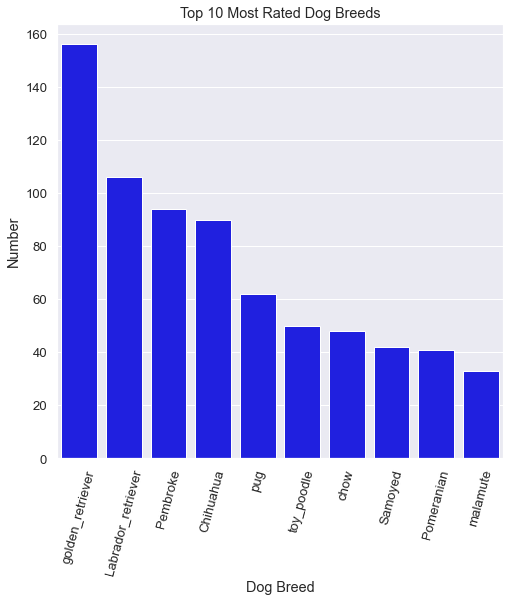

In [99]:
sns.set(rc={"figure.figsize":(8,8)}, font_scale=1.2)
ax = sns.barplot(x="dog_breed",y="frequency", data=df_most_rated, color="blue")
ax.set(title="Top 10 Most Rated Dog Breeds", xlabel="Dog Breed", ylabel="Number")
plt.xticks(rotation=75)

plt.show();

#### Insight 1:
> Based on the number of tweets gathered between `2015-11-15` and `2017-08-01`, golden_retriever is the most popular dog breed. 

#### Question 2: what is the top 10 Most liked dog breeds

In [100]:
most_liked = twitter_archive_master.groupby(["dog_breed"])["favorite_count"].sum().sort_values(ascending=False)[:10]
df_most_liked = most_liked.reset_index()
df_most_liked.index = np.arange(1, len(df_most_liked)+1)
df_most_liked

,dog_breed,favorite_count
1,golden_retriever,1943782
2,Labrador_retriever,1265355
3,Pembroke,1038797
4,Chihuahua,743689
5,Samoyed,583906
6,French_bulldog,570921
7,chow,446933
8,cocker_spaniel,407412
9,pug,383817
10,toy_poodle,337270


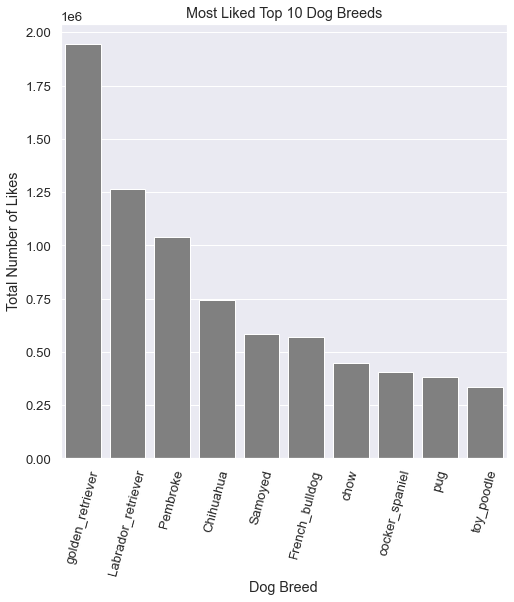

In [101]:
sns.set(rc={"figure.figsize":(8,8)}, font_scale=1.2)
ax = sns.barplot(x="dog_breed",y="favorite_count", data=df_most_liked, color="grey")
ax.set(title="Most Liked Top 10 Dog Breeds", xlabel="Dog Breed", ylabel="Total Number of Likes")
plt.xticks(rotation=75)

plt.show();

#### Insight 2:
> The top 10 most liked dog breed tweets are as displayed in the chart above with golden_retriever being the most liked. 

#### Question 3: The top 10 most retweeted dog breeds 

In [102]:
most_retweet = twitter_archive_master.groupby("dog_breed")["retweet_count"].sum().sort_values(ascending=False)[:10]
df_most_retweet = most_retweet.reset_index()
df_most_retweet.index = np.arange(1, len(df_most_retweet)+1) 
df_most_retweet

,dog_breed,retweet_count
1,golden_retriever,586657
2,Labrador_retriever,405404
3,Pembroke,291771
4,Chihuahua,250722
5,Samoyed,203446
6,French_bulldog,156230
7,cocker_spaniel,145743
8,chow,131025
9,pug,118682
10,toy_poodle,115330


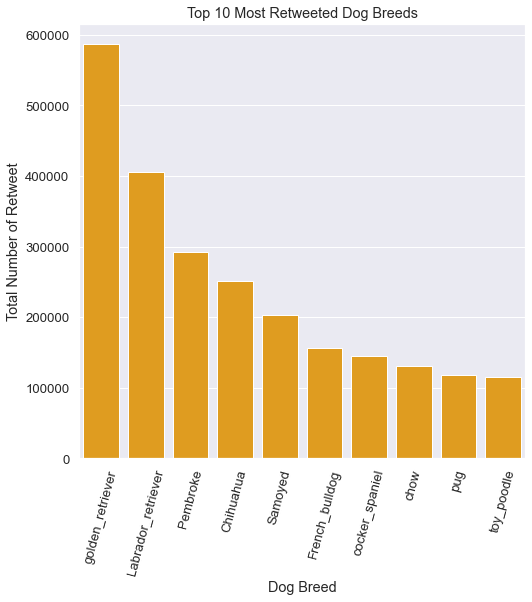

In [103]:
sns.set(rc={"figure.figsize":(8,8)}, font_scale=1.2)
ax = sns.barplot(x="dog_breed",y="retweet_count", data=df_most_retweet, color="orange")
ax.set(title="Top 10 Most Retweeted Dog Breeds", xlabel="Dog Breed", ylabel="Total Number of Retweet")
plt.xticks(rotation=75)

plt.show();

#### Insight 3: 
> The ten mosted retweeted dog breeds are as shown in the above chart with the golden_retriever being the most retweeted

#### Question 4: The dog breed with the most maximum rating

In [112]:
df_max = twitter_archive_master[twitter_archive_master["rating_numerator"]==14]
max_rated = df_max.groupby(["dog_breed","rating_numerator"]).count().sort_values(by="name", ascending=False)[:10]["name"]
df_max_rated = max_rated.reset_index(["dog_breed", "rating_numerator"])
df_max_rated.index = np.arange(1, len(df_max_rated)+1)
df_max_rated.columns = ["dog_breed", "max_rating", "count"]
df_max_rated

,dog_breed,max_rating,count
1,Pembroke,14.0,4
2,French_bulldog,14.0,3
3,golden_retriever,14.0,2
4,Bedlington_terrier,14.0,1
5,Chihuahua,14.0,1
6,Eskimo_dog,14.0,1
7,Gordon_setter,14.0,1
8,Irish_setter,14.0,1
9,Labrador_retriever,14.0,1
10,Pomeranian,14.0,1


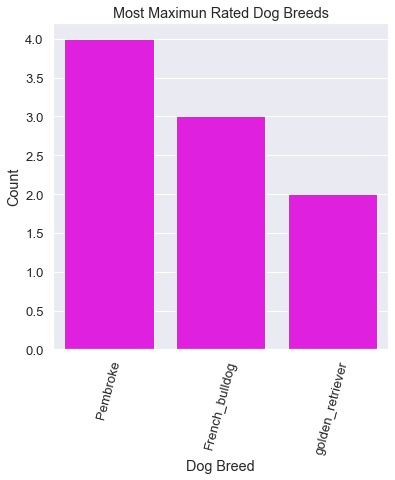

In [113]:
sns.set(rc={"figure.figsize":(6,6)}, font_scale=1.2)
ax = sns.barplot(x="dog_breed",y="count", data=df_max_rated.head(3), color="Magenta")
ax.set(title="Most Maximun Rated Dog Breeds", xlabel="Dog Breed", ylabel="Count")

plt.xticks(rotation=75)
plt.show();

#### Insight 4:
>  The dog breed with the most number of maximum rating of 14/10 is the Pembroke dog breed.